# MMI 701: Multimedia Signal Processing
## Discrete-time Signals and Systems

* We first have to ```import``` the modules that we will need.
* If you don't have them on your system install by the command ```pip install numpy``` and ```pip install matplotlib``` on *nix systems (Linux, Mac OS, BSD), or Google how you do that on Windows (Conda is an option).

In [243]:
import numpy as np
import matplotlib.pyplot as plt

## Discrete-time sinusoidal signal
* We will define the relevant parameters and a time range using numpy's ``arange`` and the calculate and plot our signal

In [244]:
F = 1000. # Frequency in Hz
Fs = 44100. # Sampling frequency in Hz
omega = 2 * np.pi * F / Fs # Radial frequency in rad/sample
A = .25 # Amplitude
Phi = np.pi/4 # Phase difference
n = np.arange(0, 400) # We will calculate 500 samples 

In [245]:
sig = A * np.sin(omega * n + Phi)

Text(0.5,0,'n')

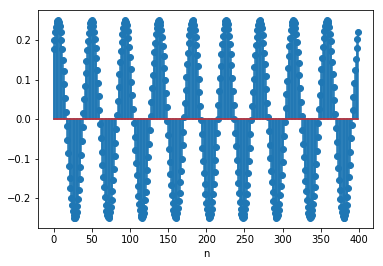

In [246]:
plt.stem(n, sig)
plt.xlabel('n')

## Quantization and quantization error

* We will first define a function that takes a continuous-valued signal $x(n)$, and then generates the quantised version $x_q(n)$.
* This function takes ```sig``` which is ```numpy.ndarray```containing the signal to be quantised, ```b```(default values is 8), as the **bit depth** (i.e. number of bits to be used) and ```mode```(default is 'round'; can also take 'truncate') as its arguments and produces the the quantised signal

In [247]:
def quantise(sig, b=8, mode='round'):
    xmax = np.max(sig)
    xmin = np.min(sig)
    drange = xmax-xmin
    delta = drange / 2**b
    if mode=='round':
        qsig = np.round(sig / delta)
        qsig = qsig / np.max(np.abs(qsig)) * max(np.abs(xmax), np.abs(xmin))
    elif mode=='truncate':
        qsig = np.floor(sig / delta)
        qsig = qsig / np.max(np.abs(qsig)) * max(np.abs(xmax), np.abs(xmin))
    else:
        raise ValueError('Argument 3 can only be \'round\' or \'truncate\'')
        return 0
    return qsig

* We will use the discrete-time sinusoid that we generated earlier.
* We will quantise the signal using 8-bits and 9-bits and then calculate and plot the quantisation errors.

In [248]:
qsig8 = quantise(sig, 8, 'round')
qsig9 = quantise(sig, 9, 'round')
eq8 = qsig8-sig
eq9 = qsig9-sig

Text(0,0.5,'Quantisation Error')

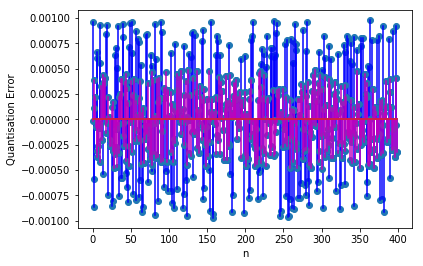

In [250]:
plt.stem(n, eq8, 'b') # Quantisation error with 8-bit quantisation (in Blue)
plt.stem(n, eq9, 'm') # Quantisation error with 9-bit quantisation (in Magenta)
plt.xlabel('n')
plt.ylabel('Quantisation Error')

* Finally, we will calculate the quantisation error power for th two different bit-depths as well as the associated SQNRs and the SQNR improvement.
* Since we are using a short signal whose length is not a multiple of a period, the SQNR improvement is slightly different than 6.02 dB which we derived in the lecture.

In [251]:
Pq8 = np.sum(eq8**2)
Pq9 = np.sum(eq9**2)
Px = np.sum(sig**2)
SQNR8 = 10 * np.log10(Px/Pq8)
SQNR9 = 10 * np.log10(Px/Pq9)
print('SQNR improvement is '+ str(SQNR9-SQNR8) + ' dB')

SQNR improvement is 6.06755996773844 dB


## Cross-correlation and Auto-correlation

* We will first start be defining the number of samples to be used in the creation of the signals and then a delay.
* We will then create two exponentially decaying signals. The second signal will be a shifted signal. We will then plot them in different colours.

Text(0.5,0,'n')

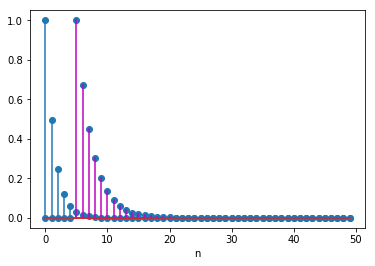

In [252]:
numsamp = 50
nd = 5
n = np.arange(0, numsamp)
sig1 = np.exp(-0.7 * n)
sig2 = np.exp(-0.4 * (n-nd)) # Let us shift the signal by nd samples
sig2[0:nd] = 0 # Let us make it a causal signal (i.e. the values before n=nd are set to zero)
plt.stem(n, sig1)
plt.stem(n, sig2, 'm')
plt.xlabel('n')

* We will now use numpy's correlate function to calculate the cross-correlation of the two signals as well as the autocorrelation of the first signal
* We will plot and then calculate the lag at which the two signals are maximally correlated
* Notice that shifting one of the signals shifts the lag at which the cross-correlation is maximum by the same amount. Cross-correlation of two signals are typically used to identify the lag in between two signals. For example, time delay of arrival between two sensors (i.e. microphones, or ears) can be estimated via cross-correlation.

In [221]:
xc12 = np.correlate(sig1, sig2, 'full')
xc11 = np.correlate(sig1, sig1, 'full')

('Maximum of the cross-correlation occurs at l=', -5)


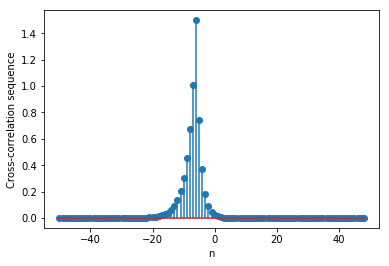

In [254]:
plt.stem(np.arange(-50,49),xc12)
plt.xlabel('n')
plt.ylabel('Cross-correlation sequence')
print('Maximum of the cross-correlation occurs at l=', np.argmax(xc12) - numsamp + 1) # We subtract the mid-point lag

('Maximum of the cross-correlation occurs at l=', 0)


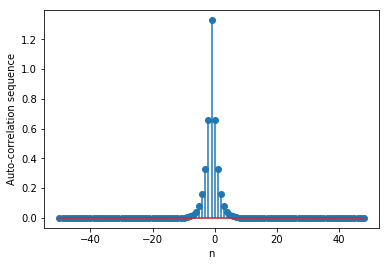

In [255]:
plt.stem(np.arange(-50,49),xc11)
plt.xlabel('n')
plt.ylabel('Auto-correlation sequence')
print('Maximum of the cross-correlation occurs at l=', np.argmax(xc11) - numsamp + 1) # We subtract the mid-point lag

* Let us now see what happens when we convolve one of these signals with an LTI system impulse response $h(n)$
* Length of the convolved signal is numsamp + 7 - 1 = len = 56
* Lenght of the output cross-correlation is len * 2 - 1

Text(0.5,0,'n')

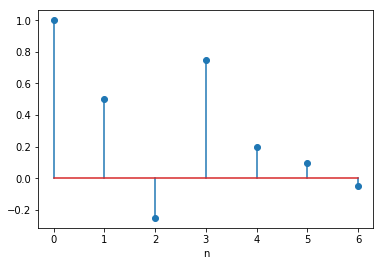

In [259]:
h = np.array([1., 0.5, -0.25, 0.75, 0.2, 0.1, -0.05])
nh = np.arange(0,7)
plt.stem(nh, h)
plt.xlabel('n')

In [271]:
x = sig1
y = np.convolve(x, h)
ryy = np.correlate(y, y, 'full')
rxx = np.correlate(x, x, 'full')
rhh = np.correlate(h, h, 'full')

<StemContainer object of 3 artists>

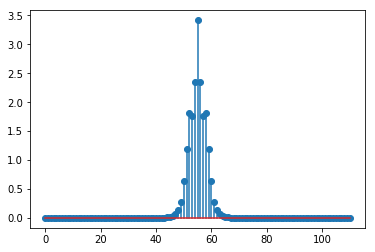

In [275]:
plt.stem(ryy)

<StemContainer object of 3 artists>

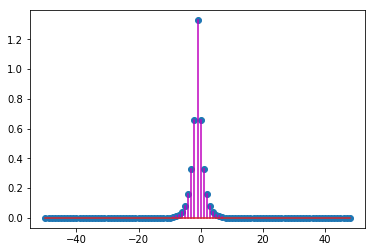

In [276]:
plt.stem(np.arange(-50,49), rxx, 'm')

<StemContainer object of 3 artists>

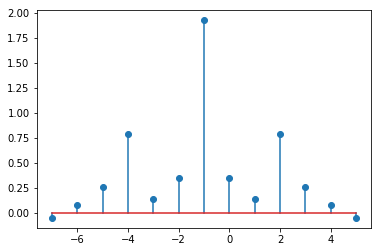

In [274]:
plt.stem(np.arange(-7,6), rhh)

* Let us now show that $r_{yy}(l)=r_{xx}(l)\ast{}r_{hh}(l)$
* **The very small difference is due to numerical precision**

Text(0,0.5,'Difference between input/output correlations')

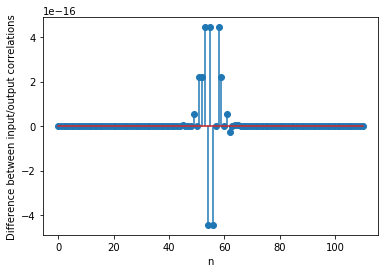

In [279]:
ryyp = np.convolve(rxx, rhh, 'full')
plt.stem(ryy-ryyp)
plt.xlabel('n')
plt.ylabel('Difference between input/output correlations')

#### © 2020, Huseyin Hacihabiboglu, (hhuseyin@metu.edu.tr), METU Graduate School of Informatics